# COVID-19 ARIMA

In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima_model import ARIMA, ARMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller  

In [2]:
Confirmed = pd.read_csv("./time_series_19-covid-Confirmed.csv")
Deaths = pd.read_csv("./time_series_19-covid-Deaths.csv")
Recovered = pd.read_csv("./time_series_19-covid-Recovered.csv")

In [3]:
Confirmed["Case"] = "Confirmed"
Deaths["Case"] = "Deaths"
Recovered["Case"] = "Recovered"

In [4]:
Combined = pd.concat([Confirmed, Deaths, Recovered], axis=0)
Combined.to_csv("time_series_19-covid-Combined.csv", index=False)

### EDA done in tableau:
### https://public.tableau.com/profile/julian.lafaye#!/vizhome/COVID-19Test/Sheet4?publish=yes

In [6]:
df = Combined.groupby(by='Case').sum().drop(columns=['Lat', 'Long']).T

In [7]:
dates = pd.to_datetime(df.index)
df.set_index(dates, inplace=True)

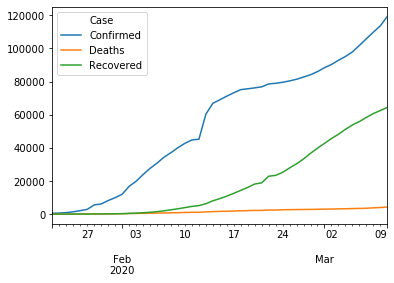

In [8]:
df.plot();

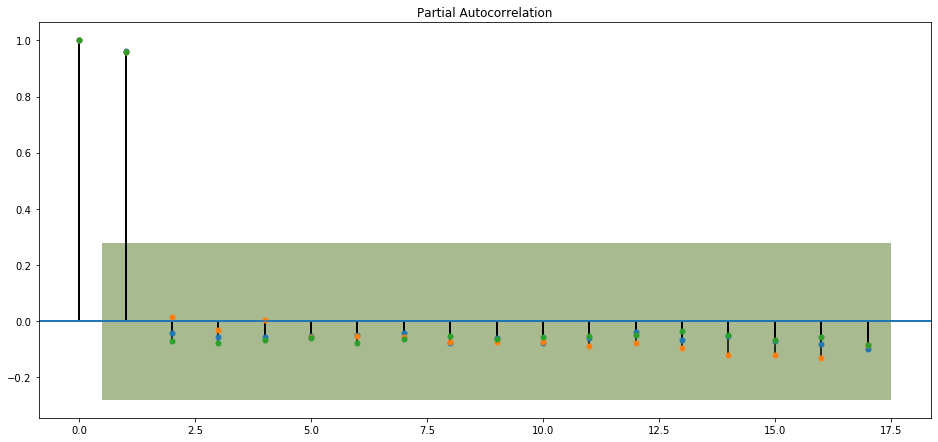

In [9]:
fig = plt.figure(figsize=(16,16))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(211)
ax3 = fig.add_subplot(211)
fig = plot_pacf(df['Confirmed'], ax=ax1)
fig = plot_pacf(df['Deaths'], ax=ax2)
fig = plot_pacf(df['Recovered'], ax=ax3);


In [10]:
train = df.iloc[:37]
test = df.iloc[37:]
plt.figure()
plt.plot(train)
plt.plot(test)

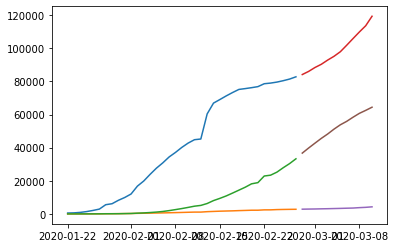

In [11]:
# model = ARMA()
train_test_plot(train, test)

In [12]:
train_endog = train['Deaths'].values
train_exog = train['Confirmed'].values
train_dates = train.index
test_exog = test['Confirmed'].values
test_endog = test['Deaths'].values

In [13]:
# Fit an AR(2) model.
model = ARIMA(endog = train_endog,
            dates = train_dates,
            exog = train_exog,
            order = (2,0,0)).fit()

C:\Users\JayLa\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\JayLa\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Training MSE: 3094.258737926534
Testing MSE: 115677.86669602955


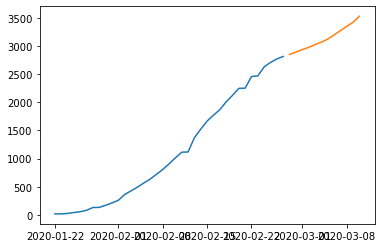

In [14]:
start = test.index[0]
end = test.index[-1]
# Generate predictions.
ARiMA_pred = model.predict(start = start,
                       end = end,
                       exog = test_exog)

# Evaluate our model on the trainign and testing sets.
print(f'Training MSE: {mean_squared_error(train_endog, model.predict())}')
print(f'Testing MSE: {mean_squared_error(test_endog, ARiMA_pred)}')

preds = pd.DataFrame(ARiMA_pred, index=test.index, columns = ['Weekly Sales'])

plt.figure()
plt.plot(train_endog)
plt.plot(preds)

In [15]:
error = mean_squared_error(test_endog, preds)
print(f'MSE: {round(error, 2)}')

MSE: 115677.87


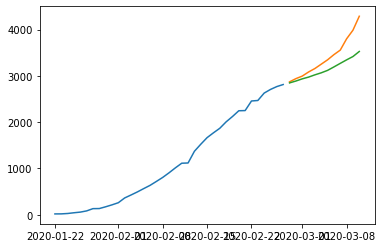

In [17]:
plt.figure()
plt.plot(train['Deaths'])
plt.plot(test['Deaths'])
plt.plot(preds);